- A. Split Data Train & Test 
- B. Modeling (Algoritma yang diimplementasikan tidak terbatas yang diajarkan di kelas)
- C. Model Evaluation: Pemilihan dan perhitungan metrics model
- D. Model Evaluation: Apakah model sudah best-fit? Hindari Overfit/Underfit. Validasi 
dengan cross-validation
- E. Hyperparameter Tuning

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from imblearn import under_sampling, over_sampling
from sklearn.model_selection import train_test_split

In [3]:
#Data test
df = pd.read_csv('Data/data_pre.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12205 entries, 0 to 12204
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Month                           12205 non-null  int64  
 1   OperatingSystems                12205 non-null  int64  
 2   Browser                         12205 non-null  int64  
 3   Region                          12205 non-null  int64  
 4   TrafficType                     12205 non-null  int64  
 5   VisitorType                     12205 non-null  object 
 6   Weekend                         12205 non-null  int64  
 7   Revenue                         12205 non-null  bool   
 8   yj_Administrative               12205 non-null  float64
 9   yj_Administrative_Duration      12205 non-null  float64
 10  yj_Informational                12205 non-null  float64
 11  yj_Informational_Duration       12205 non-null  float64
 12  yj_ProductRelated               

## A. Split Data Train & Test 

In [4]:
X = df[[col for col in df.columns if col not in ['VisitorType','Revenue','yj_ExitRates']]]
y = df['Revenue']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

##### Over Sampling

In [6]:
X_train_over_SMOTE, y_train_over_SMOTE = over_sampling.SMOTE(0.6,random_state=123).fit_resample(X_train, y_train)

In [7]:
print('Nilai unik target sebelum oversampling:\n', pd.Series(y).value_counts())
print('Nilai unik target sesudah oversampling:\n', pd.Series(y_train_over_SMOTE).value_counts())

Nilai unik target sebelum oversampling:
 False    10297
True      1908
Name: Revenue, dtype: int64
Nilai unik target sesudah oversampling:
 False    8268
True     4960
Name: Revenue, dtype: int64


In [8]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_validate

def eval_classification(model):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train)
    
    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))
    
    print("roc_auc (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))
    print("roc_auc (train-proba): %.2f" % roc_auc_score(y_train, y_pred_proba_train[:, 1]))

    score = cross_validate(model, X, y, cv=5, scoring='roc_auc', return_train_score=True)
    print('roc_auc (crossval train): '+ str(score['train_score'].mean()))
    print('roc_auc (crossval test): '+ str(score['test_score'].mean()))
    

def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def show_best_hyperparameter(model):
    print(model.best_estimator_.get_params())

In [9]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

def draw_learning_curve(param_values):
    train_scores = []
    test_scores = []

    for c in param_values:
        model = LogisticRegression(penalty='l2', C=c)
        model.fit(X_train, y_train)

        # eval on train
        y_pred_train_proba = model.predict_proba(X_train)
        train_auc = roc_auc_score(y_train, y_pred_train_proba[:,1])
        train_scores.append(train_auc)

        # eval on test
        y_pred_proba = model.predict_proba(X_test)
        test_auc = roc_auc_score(y_test, y_pred_proba[:,1])
        test_scores.append(test_auc)

        print('param value: ' + str(c) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc))

    plt.plot(param_values, train_scores, label='Train')
    plt.plot(param_values, test_scores, label='Test')
    plt.xlabel('C')
    plt.ylabel('AUC')
    plt.title('Learning Curve - Hyperparameter C - Logistic Regression')
    plt.legend()
    plt.show()

## B. Modeling (Algoritma yang diimplementasikan tidak terbatas yang diajarkan di kelas)

## C. Model Evaluation: Pemilihan dan perhitungan metrics model

## D. Model Evaluation: Apakah model sudah best-fit? Hindari Overfit/Underfit. Validasi dengan cross-validation

In [10]:
from sklearn.linear_model import LogisticRegression # import logistic regression dari sklearn
logreg = LogisticRegression() # inisiasi object dengan nama logreg
logreg.fit(X_train, y_train) # fit model regression dari data train
eval_classification(logreg)

Accuracy (Test Set): 0.88
Precision (Test Set): 0.66
Recall (Test Set): 0.59
F1-Score (Test Set): 0.62
roc_auc (test-proba): 0.91
roc_auc (train-proba): 0.90
roc_auc (crossval train): 0.9028102780148334
roc_auc (crossval test): 0.881729462893464


## Oversampling

In [11]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_validate

def eval_classification1(model):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train_over_SMOTE)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train_over_SMOTE)
    
    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))
    
    print("roc_auc (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))
    print("roc_auc (train-proba): %.2f" % roc_auc_score(y_train_over_SMOTE, y_pred_proba_train[:, 1]))

    score = cross_validate(model, X, y, cv=5, scoring='roc_auc', return_train_score=True)
    print('roc_auc (crossval train): '+ str(score['train_score'].mean()))
    print('roc_auc (crossval test): '+ str(score['test_score'].mean()))

In [12]:
from sklearn.linear_model import LogisticRegression # import logistic regression dari sklearn
logreg = LogisticRegression() # inisiasi object dengan nama logreg
logreg.fit(X_train_over_SMOTE, y_train_over_SMOTE) # fit model regression dari data train
eval_classification1(logreg)

Accuracy (Test Set): 0.87
Precision (Test Set): 0.58
Recall (Test Set): 0.78
F1-Score (Test Set): 0.67
roc_auc (test-proba): 0.90
roc_auc (train-proba): 0.92
roc_auc (crossval train): 0.9028102780148334
roc_auc (crossval test): 0.881729462893464


## Feature Importance

## E. Hyperparameter Tuning

In [13]:
from sklearn.model_selection import RandomizedSearchCV

penalty = ['l1', 'l2']
C = [float(x) for x in np.linspace(0.0001, 0.05, 100)]
hyperparameters = dict(penalty=penalty, C=C)

logreg = LogisticRegression()
rs = RandomizedSearchCV(logreg, hyperparameters, scoring='roc_auc', random_state=1, cv=5, n_iter=50)
rs.fit(X_train, y_train)
eval_classification(rs)

Accuracy (Test Set): 0.87
Precision (Test Set): 0.66
Recall (Test Set): 0.44
F1-Score (Test Set): 0.53
roc_auc (test-proba): 0.91
roc_auc (train-proba): 0.90
roc_auc (crossval train): 0.9045064279023874
roc_auc (crossval test): 0.8874684222974057


In [14]:
show_best_hyperparameter(rs)

{'C': 0.0026202020202020205, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


In [15]:
X.columns

Index(['Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType',
       'Weekend', 'yj_Administrative', 'yj_Administrative_Duration',
       'yj_Informational', 'yj_Informational_Duration', 'yj_ProductRelated',
       'yj_ProductRelated_Duration', 'yj_BounceRates', 'yj_PageValues',
       'yj_SpecialDay', 'visitor_type_Other',
       'visitor_type_Returning_Visitor'],
      dtype='object')

In [16]:
rs.best_estimator_.coef_

array([[ 9.14938302e-02, -4.42865338e-02,  8.92376383e-03,
        -1.52239239e-02, -3.54101567e-02,  3.09788260e-02,
        -2.69283221e-02, -3.77934925e-04,  1.71488642e-02,
        -2.57609318e-02,  4.22689882e-02,  8.36861268e-02,
        -2.81915392e-01,  1.06036836e+00, -8.41707808e-02,
        -3.81337782e-03, -1.84820496e-01]])

param value: 0.0001; train: 0.867163912668907; test: 0.8650035648150363
param value: 0.0006040404040404041; train: 0.8978041589376218; test: 0.9003323173211729
param value: 0.0011080808080808082; train: 0.9009108954308732; test: 0.9044509945594701
param value: 0.0016121212121212123; train: 0.9021606399519829; test: 0.9062286170910151
param value: 0.002116161616161616; train: 0.9025996432350483; test: 0.9072167168292765
param value: 0.0026202020202020205; train: 0.902743875621234; test: 0.9078925961901937
param value: 0.0031242424242424243; train: 0.9027681299462653; test: 0.9082550589271103
param value: 0.003628282828282828; train: 0.9027437139257339; test: 0.9084440658988359
param value: 0.004132323232323233; train: 0.9026749124903954; test: 0.908539765631355
param value: 0.004636363636363637; train: 0.9026331950513415; test: 0.9087215951231417
param value: 0.0051404040404040416; train: 0.9025792696020222; test: 0.9088017436491266
param value: 0.005644444444444445; train: 0.9025236463

param value: 0.0489919191919192; train: 0.9012100321062585; test: 0.9075313296999334
param value: 0.0494959595959596; train: 0.901207364130505; test: 0.9075265447133074
param value: 0.05; train: 0.9012034834385; test: 0.9075169747400555


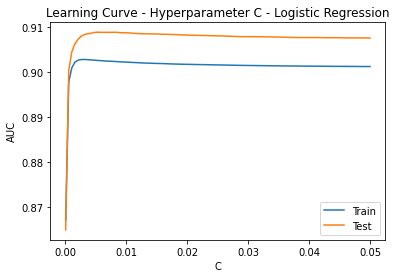

In [17]:
# learning curve
import numpy as np
param_values = [float(x) for x in np.linspace(0.0001, 0.05, 100)]
draw_learning_curve(param_values)

#### huhu modelnya underfitting